In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_6_descriptive = get_prompt("descriptive", 6)
prompt_6_natural = get_prompt("natural", 6)

prompt_6_descriptive, prompt_6_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time. 6. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD, SASA, and radius of gyration of the simulation.')

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_6_descriptive)

Thought: I'll help complete these tasks step by step. Let's start by downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have the PDB file downloaded, let's analyze its secondary structure using ComputeDSSP.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_183118",
        "target_frames": "all"
    }
}
```

Thought: Let's continue with the next tasks. We need to set up and run a simulation for 1ps at 300K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_183118",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3p.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,


({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_183118: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_183118
 rec0_183121: dssp values for trajectory with id: 1LYZ_183118
 1LYZ_183132: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_183137: Initial positions for simulation sim0_183137
 sim0_183137: Basic Simulation of Protein 1LYZ_183132
 rec0_183140: Simulation trajectory for protein 1LYZ_183132 and simulation sim0_183137
 rec1_183140: Simulation state log for protein 1LYZ_183132 and simulation sim0_183137
 rec2_183140: Simulation pdb frames for protein 1LYZ_183132 and simulation sim0_183137
 rmsd_183137: RMSD for 183137
 fig0_183601: RMSD plot for 183137
 rgy_rec0_183140: Radii of gyration per frame for rec0_183140
 fig0_183604: Plot of radii of gyration over time for rec0_183140
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_184449: Plot of SASA over time for 1LYZ


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_183118"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_183118", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [10]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_183140")
top_path_1 = registry_1.get_mapped_path("top_sim0_183137")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

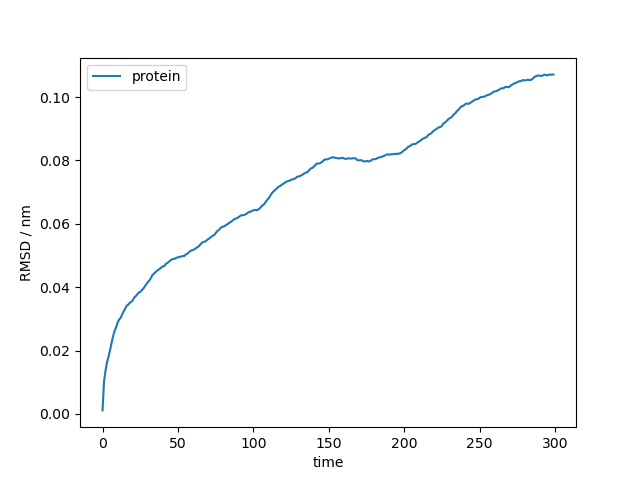

In [15]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_183601'))

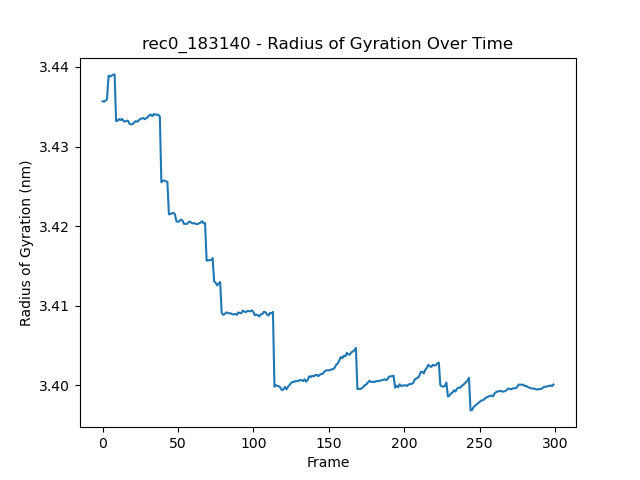

In [14]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_183604'))

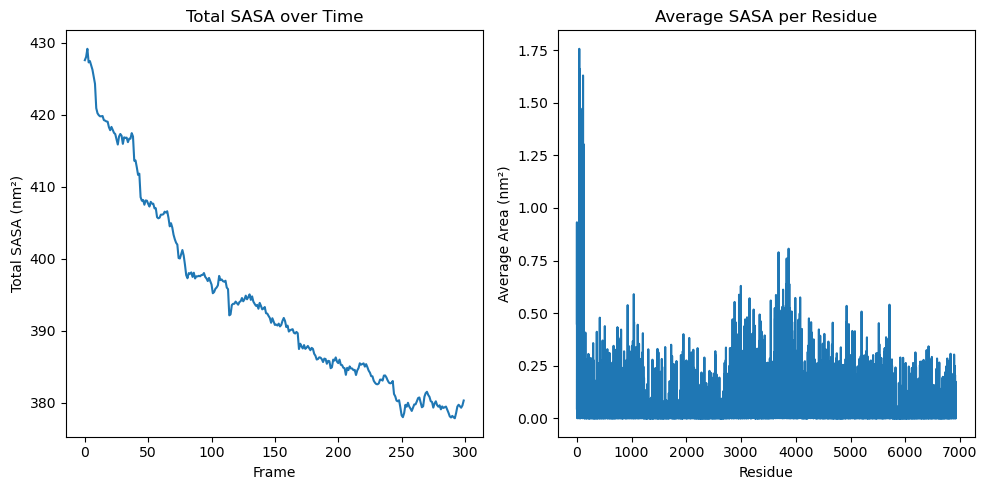

In [13]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_184449'))

In [17]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_6_natural)

Thought: Let me break this down into steps:
1. First, I need to download the 1LYZ PDB file
2. Then I'll run a simulation
3. Finally, I'll analyze the results with various metrics

Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I'll set up and run a short simulation. I'll use the SetUpandRunFunction with appropriate parameters for a 1ps simulation at 300K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_185502",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001,
            "solv

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [18]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_185502: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_185502
 1LYZ_185513: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_185518: Initial positions for simulation sim0_185518
 sim0_185518: Basic Simulation of Protein 1LYZ_185513
 rec0_185522: Simulation trajectory for protein 1LYZ_185513 and simulation sim0_185518
 rec1_185522: Simulation state log for protein 1LYZ_185513 and simulation sim0_185518
 rec2_185522: Simulation pdb frames for protein 1LYZ_185513 and simulation sim0_185518
 rec0_190145: dssp values for trajectory with id: rec0_185522
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_190150: RMSD plot for 1LYZ
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_191031: Plot of SASA over time for 1LYZ
 rgy_rec0_185522: Radii of gyration per frame for rec0_185522
 fig0_191035: Plot of radii of gyration over time for rec0_185522


In [21]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_185502"))

In [22]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_185502", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [24]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_185522")
top_path_2 = registry_2.get_mapped_path("top_sim0_185518")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

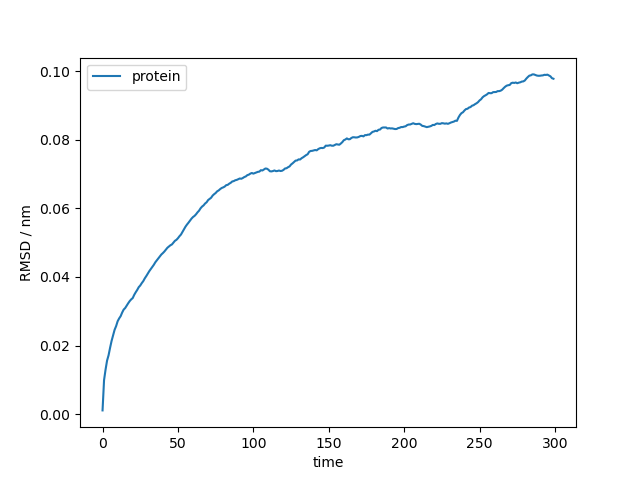

In [25]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_190150'))

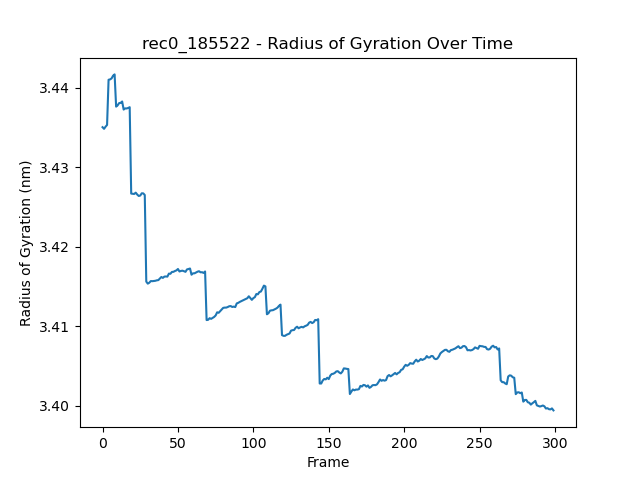

In [26]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_191035'))

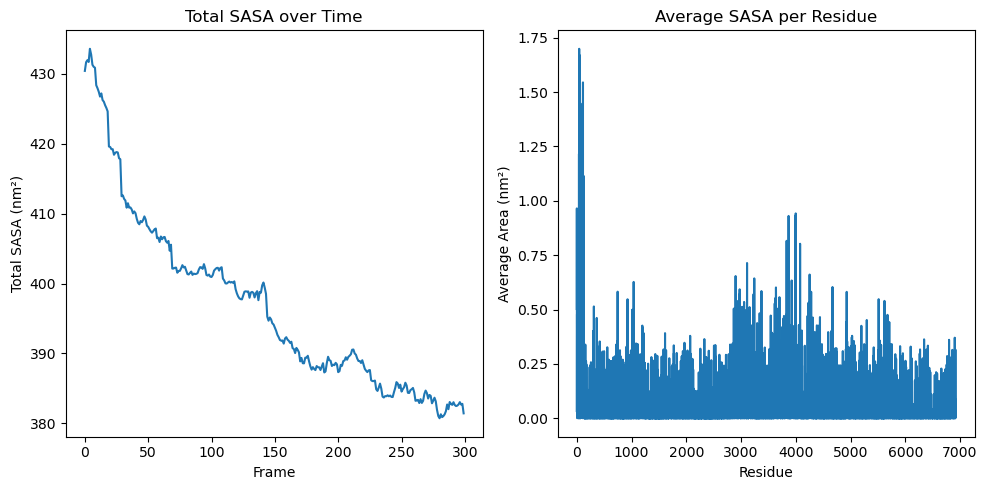

In [27]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_191031'))